In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Importing the required libraries.

In [2]:
from sklearn.cluster import KMeans  # For clustering
from sklearn.decomposition import PCA  # Linear Dimensionality reduction

In [3]:
df = pd.read_csv("sales_data_sample.csv", encoding='unicode_escape')  # Loading the dataset.
print(df)

      ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0           10107               30      95.70                2  2871.00   
1           10121               34      81.35                5  2765.90   
2           10134               41      94.74                2  3884.34   
3           10145               45      83.26                6  3746.70   
4           10159               49     100.00               14  5205.27   
...           ...              ...        ...              ...      ...   
2818        10350               20     100.00               15  2244.40   
2819        10373               29     100.00                1  3978.51   
2820        10386               43     100.00                4  5417.57   
2821        10397               34      62.24                1  2116.16   
2822        10414               47      65.52                9  3079.44   

            ORDERDATE    STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0      2/24/2003 0:00   Shipped 

In [4]:
# Dropping categorical unnecessary columns along with columns having many null values.
df_drop = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS', 'POSTALCODE', 'CITY', 
           'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 
           'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1)
print(df)

      QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES        ORDERDATE  \
0                  30      95.70                2  2871.00   2/24/2003 0:00   
1                  34      81.35                5  2765.90  05/07/2003 0:00   
2                  41      94.74                2  3884.34  07/01/2003 0:00   
3                  45      83.26                6  3746.70   8/25/2003 0:00   
4                  49     100.00               14  5205.27  10/10/2003 0:00   
...               ...        ...              ...      ...              ...   
2818               20     100.00               15  2244.40  12/02/2004 0:00   
2819               29     100.00                1  3978.51   1/31/2005 0:00   
2820               43     100.00                4  5417.57  03/01/2005 0:00   
2821               34      62.24                1  2116.16   3/28/2005 0:00   
2822               47      65.52                9  3079.44  05/06/2005 0:00   

      QTR_ID  MONTH_ID  YEAR_ID  PRODUCTLINE  MSRP 

In [5]:
# Checking the categorical columns.
print(df['COUNTRY'].unique())
print(df['PRODUCTLINE'].unique())
print(df['DEALSIZE'].unique())

['USA' 'France' 'Norway' 'Australia' 'Finland' 'Austria' 'UK' 'Spain'
 'Sweden' 'Singapore' 'Canada' 'Japan' 'Italy' 'Denmark' 'Belgium'
 'Philippines' 'Germany' 'Switzerland' 'Ireland']
['Motorcycles' 'Classic Cars' 'Trucks and Buses' 'Vintage Cars' 'Planes'
 'Ships' 'Trains']
['Small' 'Medium' 'Large']


In [6]:
# Converting the categorical columns to dummy variables.
productline = pd.get_dummies(df['PRODUCTLINE'])
Dealsize = pd.get_dummies(df['DEALSIZE'])
df = pd.concat([df, productline, Dealsize], axis=1)

# Dropping the original categorical columns.
df_drop = ['COUNTRY', 'PRODUCTLINE', 'DEALSIZE']
df = df.drop(df_drop, axis=1)


In [7]:
# Converting 'PRODUCTCODE' to numerical values and dropping 'ORDERDATE'.
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes
df.drop('ORDERDATE', axis=1, inplace=True)  # Dropping the Orderdate as Month is already included.
print(df.dtypes)  # Checking all datatypes are numeric.


QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars           bool
Motorcycles            bool
Planes                 bool
Ships                  bool
Trains                 bool
Trucks and Buses       bool
Vintage Cars           bool
Large                  bool
Medium                 bool
Small                  bool
dtype: object


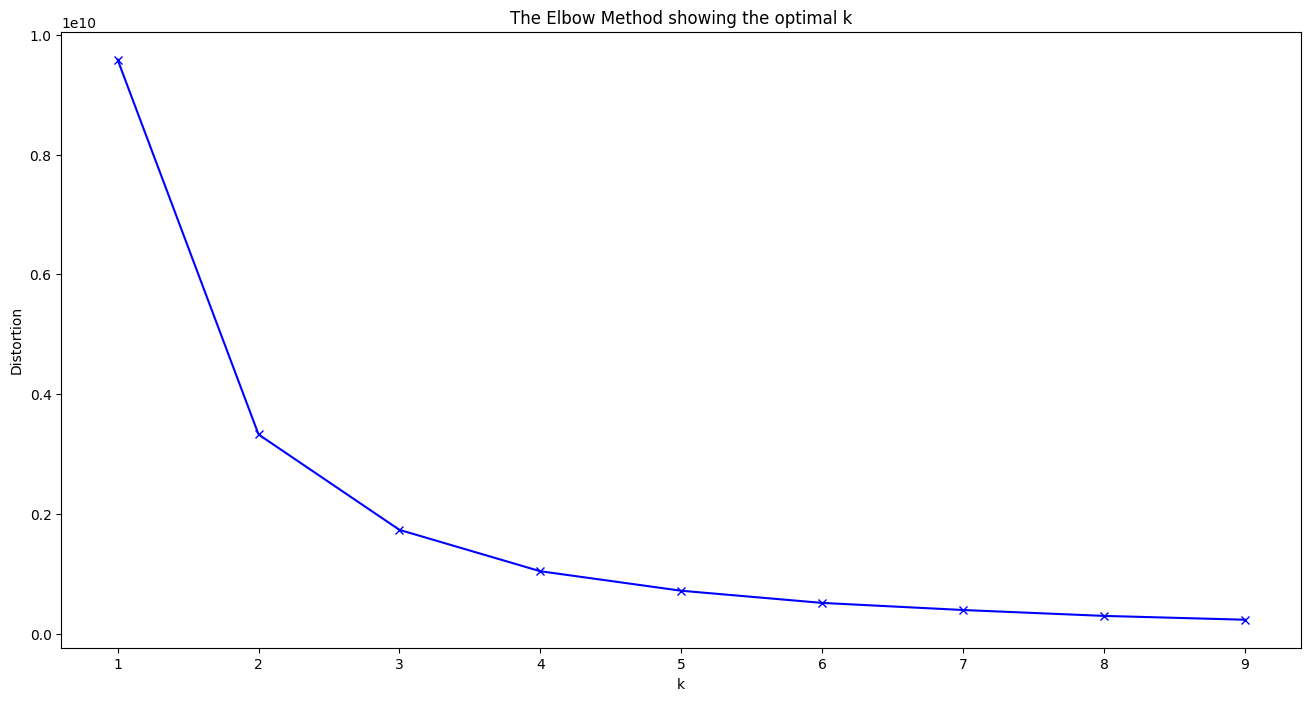

In [8]:
# Plotting the Elbow Plot to determine the number of clusters.
distortions = []  # Within Cluster Sum of Squares from the centroid
K = range(1, 10)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)  # Appending the inertia to the distortions list

plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [9]:
# From the elbow plot, we choose k=3 for clustering.
X_train = df.values  # Returns a numpy array.
print(X_train.shape)

model = KMeans(n_clusters=3, random_state=2)  # Number of clusters = 3
model = model.fit(X_train)  # Fitting the model
predictions = model.predict(X_train)  # Predicting cluster values (0, 1, or 2)

# Counting the number of samples in each cluster
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1, 3)
counts_df = pd.DataFrame(counts, columns=['Cluster1', 'Cluster2', 'Cluster3'])
print(counts_df)


(2823, 19)
   Cluster1  Cluster2  Cluster3
0      1344       398      1081


In [10]:
# Applying PCA to reduce dimensions to 2 for visualization.
pca = PCA(n_components=2)
reduced_X = pd.DataFrame(pca.fit_transform(X_train), columns=['PCA1', 'PCA2'])
print(reduced_X)


             PCA1       PCA2
0     -682.488323 -42.819535
1     -787.665502 -41.694991
2      330.732170 -26.481208
3      193.040232 -26.285766
4     1651.532874  -6.891196
...           ...        ...
2818 -1310.189713  45.876215
2819   423.701036  72.572416
2820  1862.595670  95.398858
2821 -1438.640580  51.465584
2822  -475.437557  66.613674

[2823 rows x 2 columns]


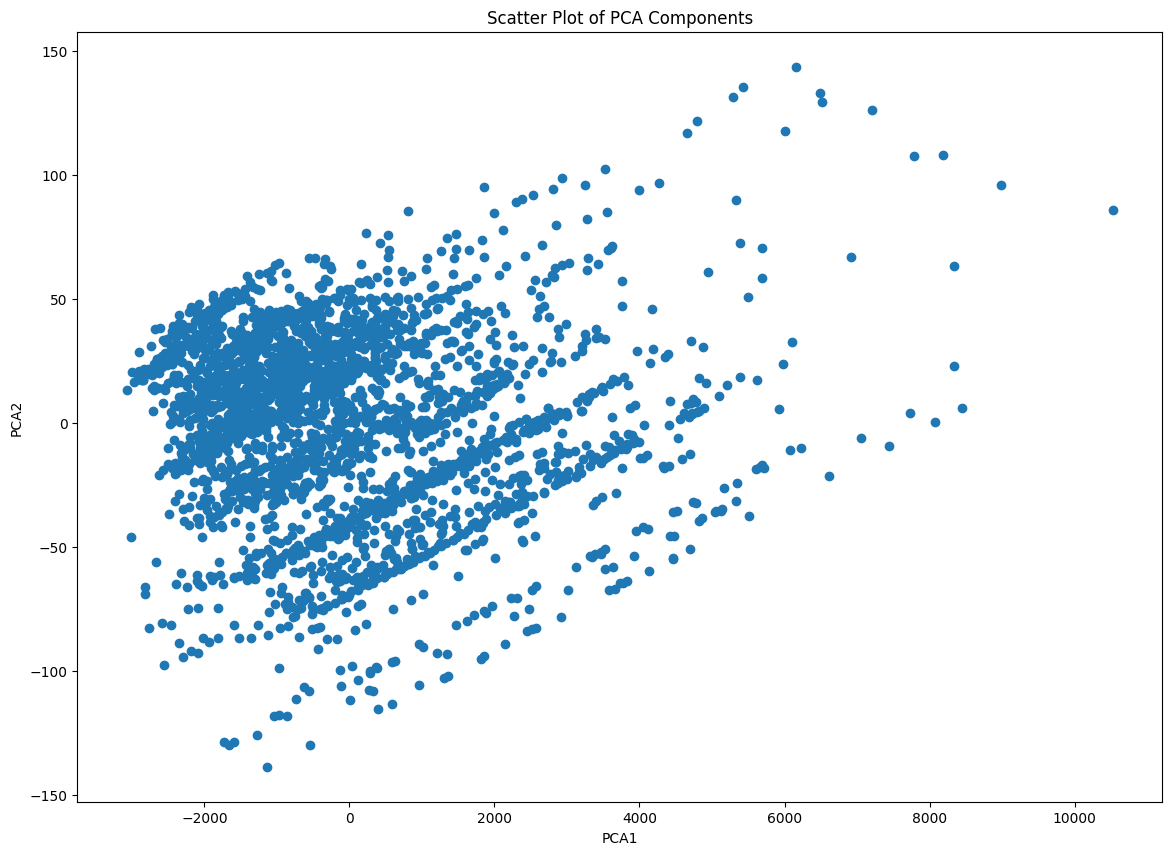

In [11]:
# Plotting the PCA results.
plt.figure(figsize=(14, 10))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'])
plt.title('Scatter Plot of PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()


[[-1.44698921e+03  2.68456273e+00]
 [ 3.44678179e+03  3.38057613e+00]
 [ 5.30004017e+02 -4.58235116e+00]]


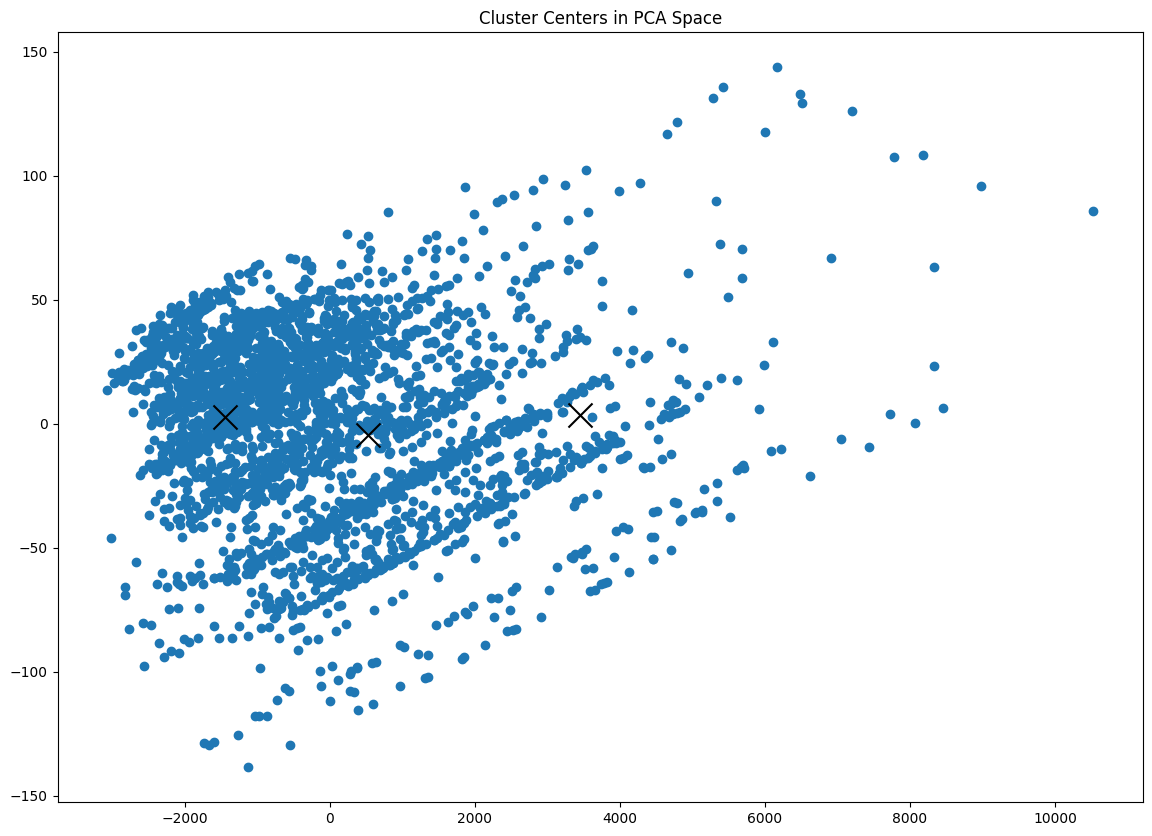

In [12]:
# Finding the centroids from the KMeans model.
centroids = model.cluster_centers_

# Transforming the centroids into PCA space.
reduced_centers = pca.transform(centroids)
print(reduced_centers)

# Plotting the data points and centroids.
plt.figure(figsize=(14, 10))
plt.scatter(reduced_X['PCA1'], reduced_X['PCA2'])
plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300)
plt.title('Cluster Centers in PCA Space')
plt.show()


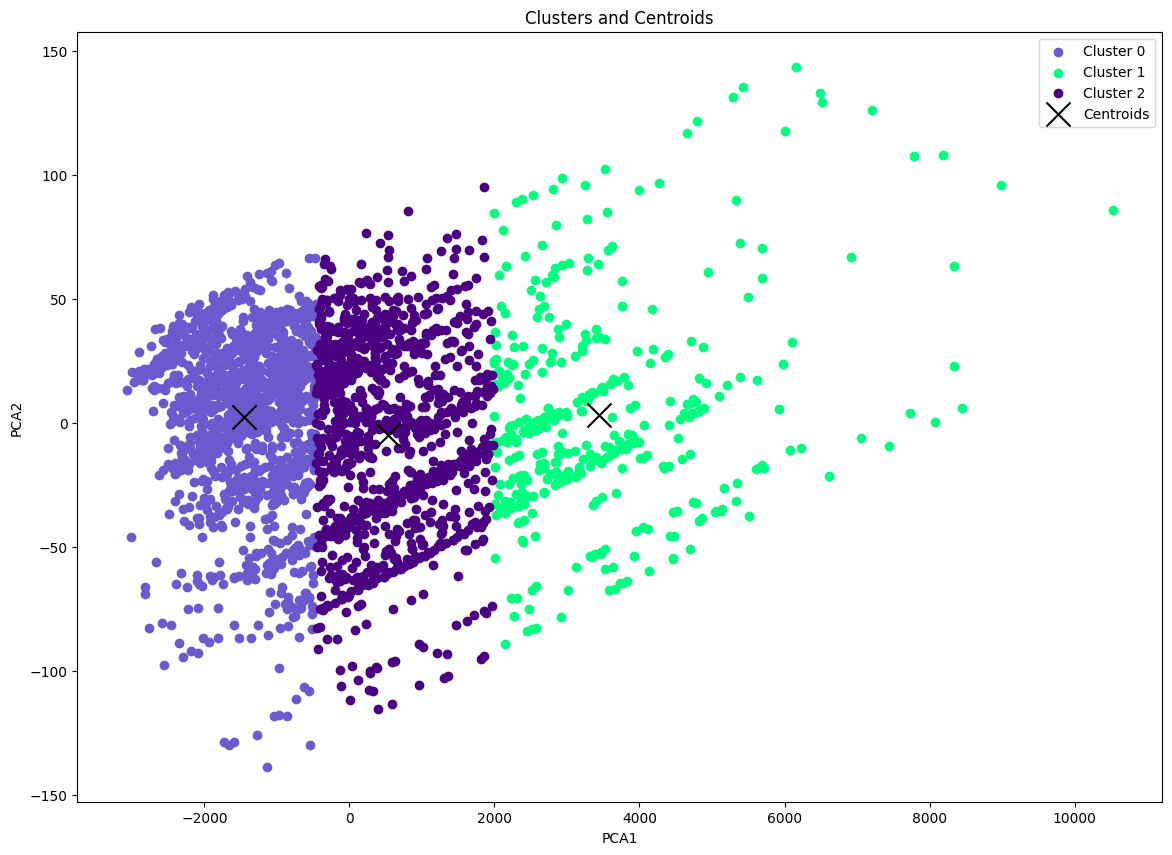

In [13]:
# Adding the cluster predictions to the PCA DataFrame.
reduced_X['Clusters'] = predictions
reduced_X.head()

# Plotting the clusters with different colors.
plt.figure(figsize=(14, 10))
plt.scatter(reduced_X[reduced_X['Clusters'] == 0]['PCA1'], reduced_X[reduced_X['Clusters'] == 0]['PCA2'], color='slateblue', label='Cluster 0')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1]['PCA1'], reduced_X[reduced_X['Clusters'] == 1]['PCA2'], color='springgreen', label='Cluster 1')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2]['PCA1'], reduced_X[reduced_X['Clusters'] == 2]['PCA2'], color='indigo', label='Cluster 2')

plt.scatter(reduced_centers[:, 0], reduced_centers[:, 1], color='black', marker='x', s=300, label='Centroids')
plt.title('Clusters and Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.show()
